In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [81]:

def get_column(data, index):
    return [row[index] for row in data]

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)

    X = [tv_data, radio_data, newspaper_data]
    #  print(X)
    Y = sales_data
    return X, Y

X,y = prepare_data('advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5])]
print(X)
print(y)

[[230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8, 66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3, 218.4, 237.4, 13.2, 228.3, 62.3, 262.9, 142.9, 240.1, 248.8, 70.6, 292.9, 112.9, 97.2, 265.6, 95.7, 290.7, 266.9, 74.7, 43.1, 228.0, 202.5, 177.0, 293.6, 206.9, 25.1, 175.1, 89.7, 239.9, 227.2, 66.9, 199.8, 100.4, 216.4, 182.6, 262.7, 198.9, 7.3, 136.2, 210.8, 210.7, 53.5, 261.3, 239.3, 102.7, 131.1, 69.0, 31.5, 139.3, 237.4, 216.8, 199.1, 109.8, 26.8, 129.4, 213.4, 16.9, 27.5, 120.5, 5.4, 116.0, 76.4, 239.8, 75.3, 68.4, 213.5, 193.2, 76.3, 110.7, 88.3, 109.8, 134.3, 28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9, 25.0, 90.4, 13.1, 255.4, 225.8, 241.7, 175.7, 209.6, 78.2, 75.1, 139.2, 76.4, 125.7, 19.4, 141.3, 18.8, 224.0, 123.1, 229.5, 87.2, 7.8, 80.2, 220.3, 59.6, 0.7, 265.2, 8.4, 219.8, 36.9, 48.3, 25.6, 273.7, 43.0, 184.9, 73.4, 193.7, 220.5, 104.6, 96.2, 140.3, 240.1, 243.2, 38.0, 44.7, 280.7, 121.

In [82]:
def initialize_params():
    # random depend on normal distribution
    w1 = random.gauss(mu = 0.0, sigma = 0.01)
    w2 = random.gauss(mu = 0.0, sigma = 0.01)
    w3 = random.gauss(mu = 0.0, sigma = 0.01)
    b = 0
    return w1, w2, w3, b

In [83]:
def Yeu_cau_tu_de():
    return (0.016992259082509283 , 0.0070783670518262355,-0.002307860847821344 , 0)

In [84]:
def compute_loss_mse(y, y_hat):
    return (y_hat - y)**2

def compute_loss_mae(y, y_hat):
    return abs(y_hat - y)
def compute_gradient_wi(x,y, y_hat):
    return 2*x*(y_hat - y)
def compute_gradient_b(y, y_hat):
    return 2*(y_hat - y)

def update_weight_wi(w, dl_dw, lr):
    return w - dl_dw*lr
def update_weight_b(b, dl_db, lr):
    return b - dl_db*lr
def predict(x1,x2,x3,w1,w2,w3,b):
    return w1*x1+ w2*x2 +  w3*x3  + b

In [85]:
def implement_linear_regression(X_data, y_data, epoch_max = 50, lr = 1e-5):
    # gradient  descent
    losses = []
    # w1, w2, w3, b = initialize_params()
    w1, w2, w3, b = Yeu_cau_tu_de()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]

            y_hat = predict(x1,x2,x3,w1,w2,w3,b)
            #print loss
            loss = compute_loss_mse(y, y_hat)

            dl_dw1 = compute_gradient_wi(x1,y,y_hat)
            dl_dw2 = compute_gradient_wi(x2,y,y_hat)
            dl_dw3 = compute_gradient_wi(x3,y,y_hat)
            dl_db   = compute_gradient_b(y,y_hat)

            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b  = update_weight_b(b,dl_db, lr)

            losses.append(loss)
    return (w1,w2,w3,b, losses)

In [86]:
y = predict( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y )
l = compute_loss_mse ( y_hat =1 , y =0.5)
print ( l )
g_wi = compute_gradient_wi ( x =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )
after_wi = update_weight_wi ( w =1.0 , dl_dw = -0.5 , lr = 1e-5)
print ( after_wi )
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )
print ( after_wi )
X,y = prepare_data('advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
print ( w1 , w2 , w3 )
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data('advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
sales = predict ( tv , radio , newspaper , w1 , w2 , w3 , b )
print (f'predicted sales is { sales }')

1.0
0.25
-1.0
-3.0
1.000005
0.50001
1.000005
0.07405984066396477 0.15917360263437663 0.017561197559948935
predicted sales is 8.176413319549823


In [87]:
l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


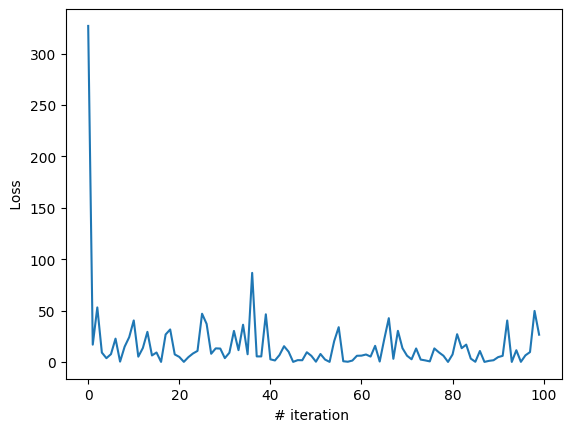

In [88]:
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression (X , y )
plt . plot ( losses [:100])
plt . xlabel ("# iteration ")
plt . ylabel (" Loss ")
plt . show ()

In [89]:
def initialize_params () :
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1 , w2 , w3 , b

In [90]:
# linear regression with minipatch -> giam nhieu
def implement_linear_regression_nsamples(X_data, y_data, epoch_max = 50, lr = 1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0
        for i in range(N):

            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]

            y = y_data[i]
            # y^ = ax + b
            y_hat = predict ( x1 , x2 , x3 , w1 , w2 , w3 , b )
            loss = compute_loss_mae(y, y_hat)
            loss_total = loss_total + loss

            dl_dw1 = compute_gradient_wi ( x1 , y , y_hat )
            dl_dw2 = compute_gradient_wi ( x2 , y , y_hat )
            dl_dw3 = compute_gradient_wi ( x3 , y , y_hat )
            dl_db = compute_gradient_b (y , y_hat )

            dw1_total = dw1_total + dl_dw1
            dw2_total = dw2_total + dl_dw2
            dw3_total = dw3_total + dl_dw3
            db_total = db_total + dl_db

        w1 -= (dw1_total / N) * lr
        w2 -= (dw2_total / N) * lr
        w3 -= (dw3_total / N) * lr
        b -= (db_total / N) * lr

        losses.append(loss_total/N)

    return ( w1 , w2 , w3 ,b , losses )

[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

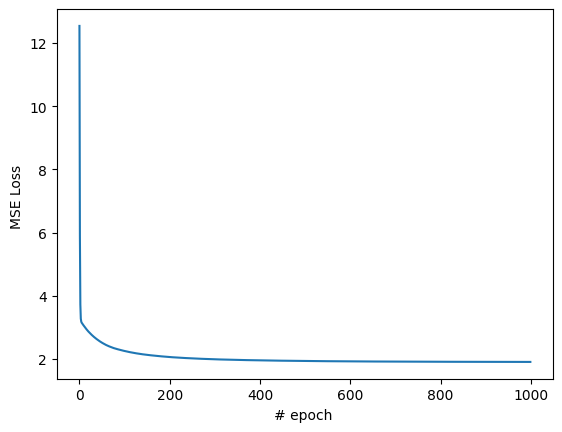

In [91]:
X , y = prepare_data ( 'advertising.csv')

( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max = 1000 , lr =1e-5)
print ( losses )
plt.plot ( losses )
plt.xlabel ("# epoch ")
plt.ylabel ("MSE Loss ")
plt.show ()

In [92]:
X , y = prepare_data ( 'advertising.csv')
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max =1000, lr = 1e-5)
print ( w1 , w2 , w3 )

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 5.905253690937074, 3.7290201321746137, 3.280103342013847, 3.1836865214240593, 3.1504551681146706, 3.1282032310037176, 3.107834776878128, 3.0877653671823877, 3.067869077619822, 3.0482166503078565, 3.02883345816351, 3.0097268958233707, 2.990926260388694, 2.9724018229858893, 2.954147483295836, 2.936159497829541, 2.9184793882434996, 2.9013201899015386, 2.8848065446993694, 2.8692913979087806, 2.8540808729447424, 2.8391539128581824, 2.824441258695949, 2.809939593214031, 2.795661552510065, 2.781611479829696, 2.7677616004414416, 2.7541088214511316, 2.7406510256334013, 2.727970116901554, 2.7155029638904806, 2.703211839174965, 2.6910940299623816, 2.6792629854501695, 2.6676459659520204, 2.6561923391983115, 2.645064404704684, 2.6341944320960224, 2.623535606535408, 2.6130255229490116, 2.6026618964920454, 2.592442478315787, 2.5823650549969863, 2.5725241259925906, 2.562865212228721, 2.553339917055549, 2.5439461929615637, 2.5347454167598515, 2.525816782277532, 2.517347376120849, 2

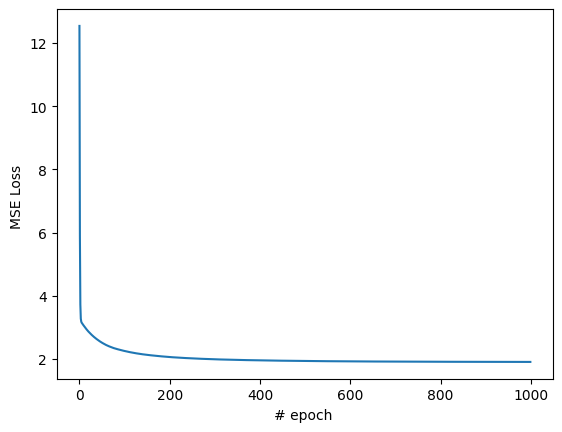

In [93]:
X , y = prepare_data ( 'advertising.csv')

( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max =1000 ,lr =1e-5)
print ( losses )
plt . plot ( losses )
plt . xlabel ("# epoch ")
plt . ylabel ("MSE Loss ")
plt . show ()

In [96]:
X,y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(
    X,
    y,
    epoch_max=1000,
    lr=1e-5
)

print(f'Weights: w1 = {w1}, w2 = {w2}, w3 = {w3}')

Weights: w1 = 0.06710990754044266, w2 = 0.15756173831487585, w3 = 0.029619799386084403


31.338878034644296


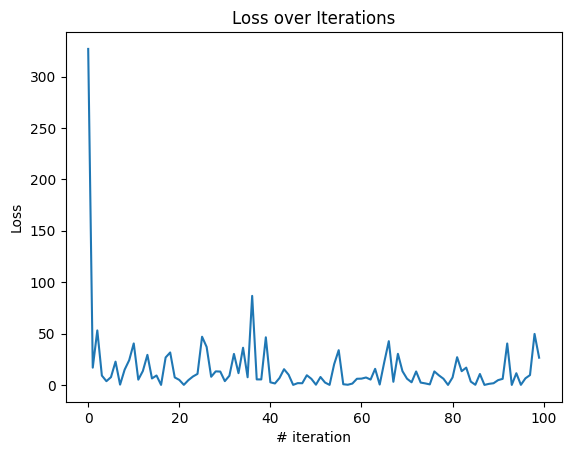

In [97]:
w1, w2, w3, b, losses = implement_linear_regression(X, y)

print(losses[9999])
plt.plot(losses[0:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.show()